# Generating Data for Simpson's Paradox

I recently came across the question [What are some correlations that seem strange at the outset?](https://www.quora.com/What-are-some-correlations-that-seem-strange-at-the-outset) and immediately thought of Simpson’s Paradox - a phenomenon in which a trend appears in several different groups of data but disappears or reverses when these groups are combined$^{[1]}$.

So, I decided to generate data that shows this effect visually. Ultimately, I wanted to generate 2 variables that have a negative correlation, but when stratified by a 3rd variable, their relationship flips to a positive correlation.

Generating correlated data is very simple using `mvrnorm()` from the [MASS](https://cran.r-project.org/web/packages/MASS/MASS.pdf) library. All that is needed are the corresponding mean for each variable, and the covariance that exists between them. To do this, we first load the library, and then define our two means:

In [26]:
# Suppressing All Warnings
options(warn=-1)

library(tidyverse)
library(MASS)
mu <- c(20,4)

Next, we define our covariance as a matrix, and specify the covariance relationship (i.e. 0.7 in this case):

In [27]:
Sigma <- matrix(.7, nrow=2, ncol=2) + diag(2)*.3

Now we have everything needed for mvrnorm to do its magic. All we need to do is specify the n for the number of observations:

In [28]:
vars <- mvrnorm(n=100, mu=mu, Sigma=Sigma)

To check that this worked, we can simply do the following:

In [29]:
head(vars)
cor(vars)

20.21321,4.520225
20.94504,4.164673
21.20805,5.357982
18.19429,2.816527
20.46522,4.619396
18.01381,2.444047


1.0000000,0.6207432
0.6207432,1.0000000


The generated variables have a covariance of ~0.7, along the lines of our expectations. We can also check to see what the relationship looks like visually:

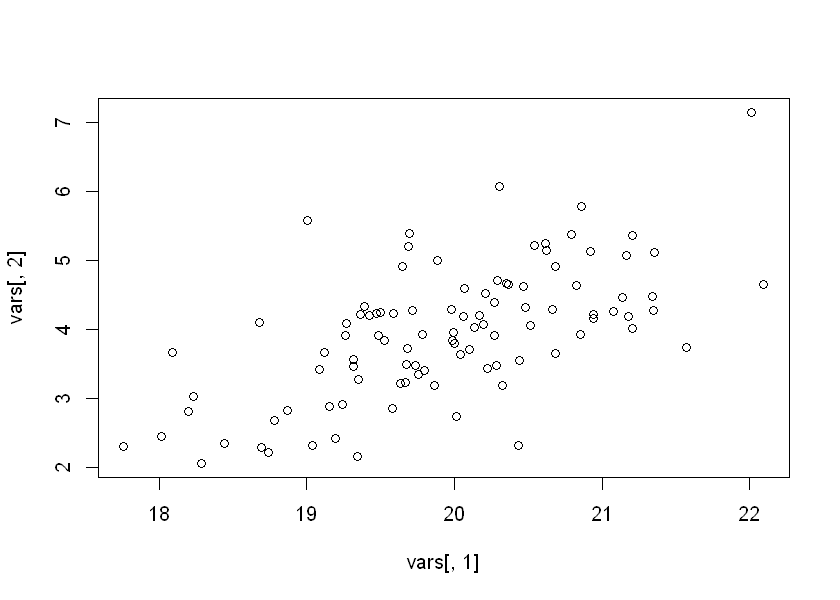

In [30]:
options(repr.plot.width = 7, repr.plot.height=5)

plot(vars[,1],vars[,2])

Looks like what we would expect.

Now that we feel comfortable with this generation, we can repeat this process while changing our corresponding values for our mean of each variable to reflect a different pattern, for 5 different strata (`confVar`). Since this is all we want to change, creating a function will make repeating the generation much easier.

We’ll also want to create a different dataframe for each generation (this will be more clear at the end):

In [31]:
corVars<-function(m1,m2,confVar){
  mu <- c(m1,m2)
  Sigma <- matrix(.7, nrow=2, ncol=2) + diag(2)*.3
  vars <- mvrnorm(n=100, mu=mu, Sigma=Sigma)
  Var1<-vars[,1]
  Var2<-vars[,2]
  df<-as.data.frame(cbind(Var1 = Var1,Var2 = Var2,Var3 = confVar))
  df$Var1<-as.numeric(as.character(df$Var1))
  df$Var2<-as.numeric(as.character(df$Var2))
  df
}

A quick check to make sure the function works:

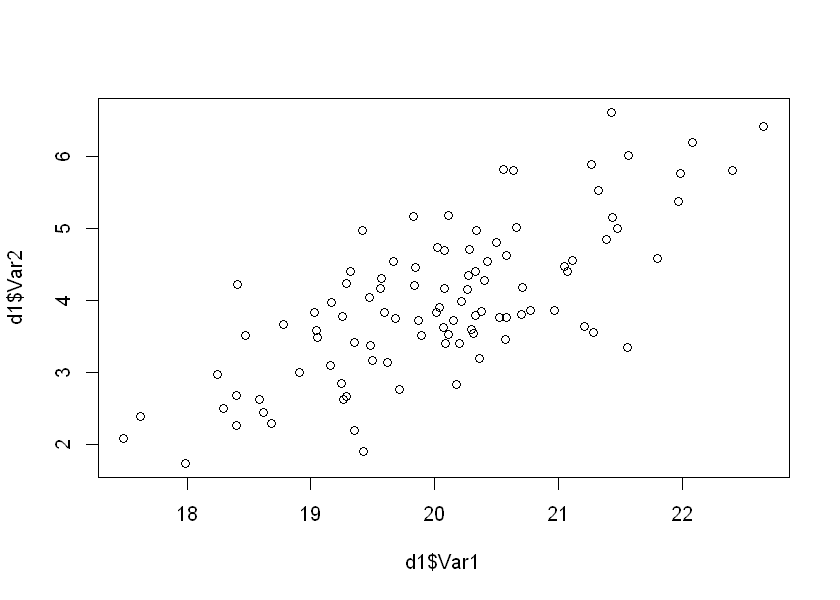

In [32]:
d1 <- corVars(m1 = 20, m2 = 4, confVar = "A")
plot(d1$Var1,d1$Var2)

Looks good.

Now, we repeat the process for each strata and then combine the dataframes into a single dataframe using `rbind`:

In [33]:
d1 <- corVars(m1 = 20, m2 = 4, confVar = "A")
d2 <- corVars(m1 = 18, m2 = 6, confVar = "B")
d3 <- corVars(m1 = 16, m2 = 8, confVar = "C")
d4 <- corVars(m1 = 14, m2 = 10, confVar = "D")
d5 <- corVars(m1 = 12, m2 = 12, confVar = "E")
 
df<-rbind(d1,d2,d3,d4,d5)

To quickly look at our generated df dataset, we can do `summary(df)`:

In [34]:
summary(df)

      Var1             Var2        Var3   
 Min.   : 9.712   Min.   : 2.088   A:100  
 1st Qu.:13.511   1st Qu.: 5.462   B:100  
 Median :16.002   Median : 8.176   C:100  
 Mean   :15.951   Mean   : 7.986   D:100  
 3rd Qu.:18.329   3rd Qu.:10.518   E:100  
 Max.   :22.595   Max.   :14.145          

Now, we’re ready to illustrate our Simpson’s Paradox. First, we check the relationship between `Var1` and `Var2` only:

In [35]:
cor.test(df$Var1,df$Var2)


	Pearson's product-moment correlation

data:  df$Var1 and df$Var2
t = -30.776, df = 498, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8377827 -0.7770402
sample estimates:
       cor 
-0.8095675 


A <b>very</b> strong negative correlation. Let's plot this out:

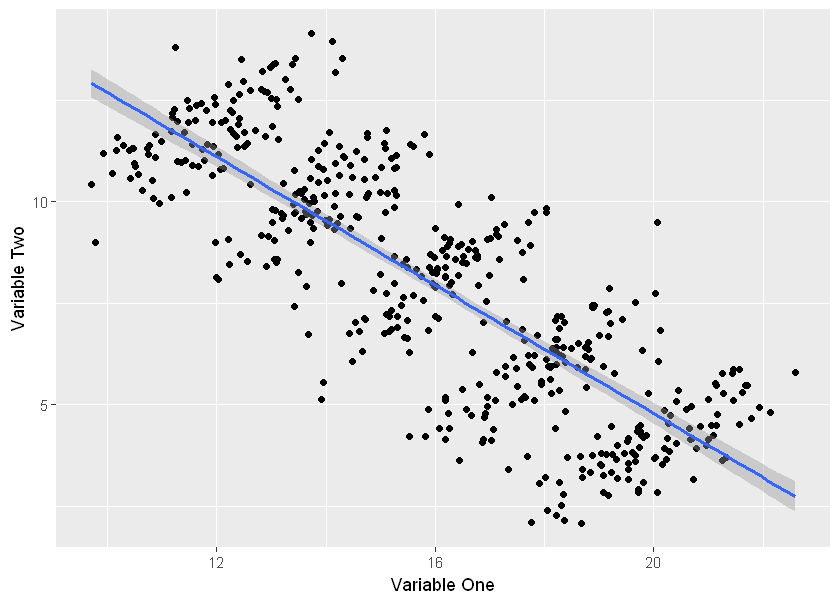

In [36]:
df %>%
  ggplot(aes(x=Var1,y=Var2)) +
  geom_point()+
  geom_smooth(method="lm")+
  xlab("Variable One")+ylab("Variable Two")

Based on our correlation coefficient of -0.82 and our visual, we can conclude that there is a negative relationship between `Var1` and `Var2`. But what happens when we consider `Var3`?

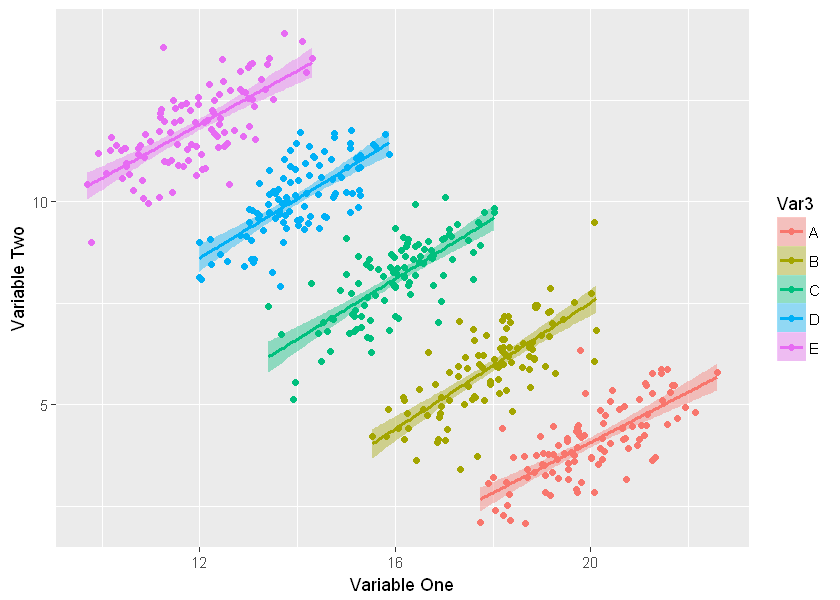

In [37]:
df %>%
  ggplot(aes(x=Var1,y=Var2,fill=Var3,colour=Var3)) +
  geom_point()+
  geom_smooth(method="lm")+
  xlab("Variable One")+ylab("Variable Two")

The same exact dataset shows us a different relationship. `Var1` and `Var2` no longer seem negatively correlated when stratified by `Var3`.

This is paradox not only exists in real data, if not explored appropriately, it can lead to wildly inaccurate results.

# Footnotes

[1] [Simpson's paradox - Wikipedia](https://en.wikipedia.org/wiki/Simpson's_paradox)